<center>
<img src="https://tensorflowkorea.files.wordpress.com/2020/12/4.-e18492e185a9e186abe1848ce185a1-e18480e185a9e186bce18487e185aee18492e185a1e18482e185b3e186ab-e18486e185a5e18489e185b5e186abe18485e185a5e18482e185b5e186bce18483e185b5e186b8e18485e185a5e.png?w=972" width="200" height="200"><br>
</center>

## 06-3 주성분 분석

### - 차원과 차원 축소

지금까지 우리는 데이터가 가진 속성을 특성이라 불렀다. 앞서 과일 사진의 경우 10000개의 픽셀이 있기 때문에 10000개의 특성이 있는 것이다. 머신러닝에서는 이런 특성을 차원이라고 부른다. 10000개의 특성은 결국 10000개의 차원이라는 것인데 이 차원을 줄일 수 있다면 저장 공간을 크게 절약할 수 있다.

이를 위해 비지도 학습 작업 중 하나인 차원 축소 알고리즘을 다뤄보자. 차원 축소는 데이터를 가장 잘 나타내는 일부 특성을 선택하여 데이터 크기를 줄이고 지도 학습 모델의 성능을 향상시킬 수 있는 방법이다.

또한 줄어든 차원에서 다시 원본 차원으로 손실을 최대한 줄이면서 복원할 수도 있다. 이번엔 대표적인 차원 축소 알고리즘인 주성분 분석을 배우자. 주성분 분석은 간단히 PCA라고 부른다.

### - 주성분 분석 소개

주성분 분석은 데이터에 있는 분산이 큰 방향을 찾는 것으로 이해할 수 있다. 분산은 데이터가 널리 퍼져있는 정도를 말한다. 분산이 큰 방향을 데이터로 잘 표현하는 벡터로 생각할 수 있다. 주성분 벡터는 원본 데이터에 있는 어떤 방향이다. 따라서 주성분 벡터의 원소 개수는 원본 데이터셋에 있는 특성 개수와 같다. 하지만 원본 데이터는 주성분을 사용해 차원을 줄일 수 있다. 주성분은 원본 차원과 같고 주성분으로 바꾼 데이터는 차원이 줄어든다는 점을 기억하자.

주성분이 가장 분산이 큰 방향이기 때문에 투영하여 바꾼 데이터는 원본이 가지고 있는 특성을 가장 잘 나타내고 있을 것이다.

### - PCA 클래스

앞서 사용했던 과일 사진 데이터를 다운로드 하여 넘파이 배열로 적재하자.

In [1]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2021-05-07 16:49:58--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2021-05-07 16:49:59--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 15.164.81.167
Connecting to github.com (github.com)|15.164.81.167|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2021-05-07 16:50:00--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... con

In [2]:
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100 * 100)

사이킷런은 sklearn.demoposition 모듈 아래 PCA 클래스로 주성분 분석 알고리즘을 제공한다. PCA 클래스의 객체를 만들 때 n_components 매개변수에 주성분의 개수를 지정해야 한다. k-평균과 마찬가지로 비지도 학습이기 때문에 fit() 메서드에 타깃값을 제공하지 않는다.

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

PCA 클래스가 찾은 주성분은 components_ 속성에 저장되어 있다. 이 배열의 크기를 확인해 보자.

In [4]:
print(pca.components_.shape)

(50, 10000)


n_components를 50으로 지정했기 때문에 pca.components 배열의 첫 번째 차원이 50이다. 즉 50개의 주성분을 찾은 것이다. 두 번째 차원은 항상 원본 데이터의 특성 개수와 같은 10000 이다. 원본 데이터와 차원이 같으므로 주성분을 100x100 크기의 이미지처럼 출력해 볼 수 있다.

In [7]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)    # n은 샘플 개수이다.
    # 한 줄에 10개씩 이미지를 그린다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산한다. 
    rows = int(np.ceil(n/10))
    # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개이다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, 
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그린다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

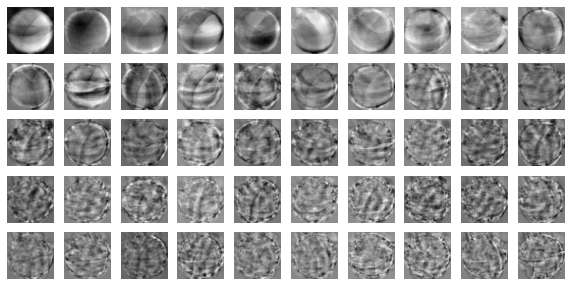

In [8]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

이 주성분은 원본 데이터에서 가장 분산이 큰 방향을 순서대로 나타낸 것이다. 한편으로는 데이터셋에 있는 어떤 특징을 잡아낸 것처럼 생각할 수도 있다. 주성분을 찾았으므로 원본 데이터를 주성분에 투영하여 특성의 개수를 10000개에서 50개로 줄일 수 있다. PCA의 trasnform() 메서드를 사용해 원본 데이터의 차원을 50으로 줄여보자.

In [9]:
print(fruits_2d.shape)

(300, 10000)


In [10]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


fruits_2d는 (300,10000) 크기의 배열이었다. 50개의 주성분으로 찾은 PCA 모델을 사용해 이를 (300,50) 크기의 배열로 변환했다. 이제 fruits_pca의 배열은 50개의 특성을 가진 데이터이다.

### - 원본 데이터 재구성

앞서 10000개의 특성을 50개로 줄였다. 이로 인해 어느 정도 손실이 발생할 수 밖에 없다. 하지만 최대한 분산이 큰 방향으로 데이터를 투영했기 때문에 원본 데이터를 상당 부분 재구성할 수도 있다. PCA 클래스는 이를 위해 inverse_transform() 메서드를 제공한다. 앞서 50개의 차원으로 축소한 fruits_pca 데이터를 전달해 10000개의 특성을 복원하자.

In [12]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


예상대로 10000개의 특성이 복원되었다. 이 데이터를 100x100 크기로 바꾸어 100개씩 나누어 출력해보자. 

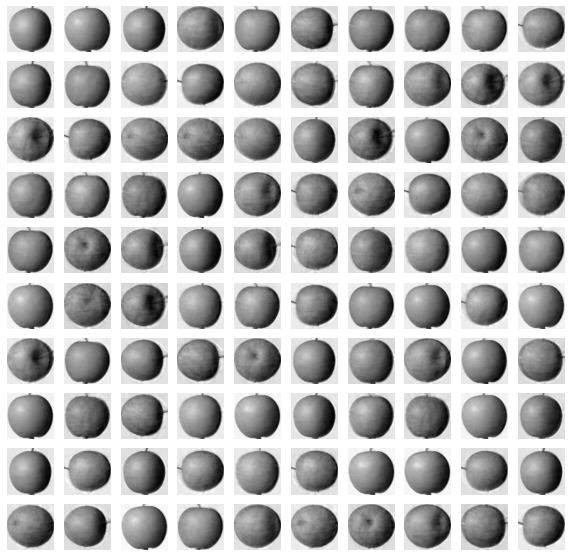

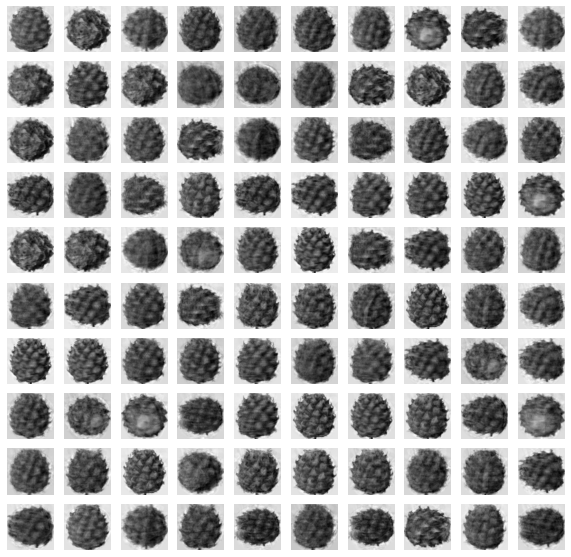

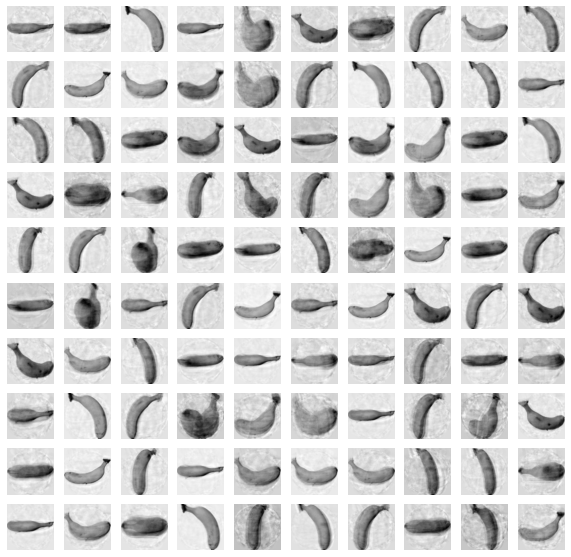

In [13]:
fruits_reconstruct = fruits_inverse.reshape(-1,100,100)
for start in [0,100,200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

모든 과일이 잘 복원 되었다. 일부 흐리고 번진 부분이 있지만 불과 50개의 특성을 10000개로 늘린 것을 감안하면 대단한 결과이다. 이 50개의 특성이 분산을 가장 잘 보존하도록 변환된 것이기 때문이다.

만약 주성분을 최대로 사용했다면 완벽하게 원본 데이터를 재구성할 수 있을 것이다.

### - 설명된 분산

주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값을 설명된 분산이라고 한다. PCA 클래스의 explained_variance_ratio_에 각 주성분의 설명된 분산 비율이 기록되어 있다. 당연히 첫 번째 주성분의 설명된 분산이 가장 크다. 이 분산 비율을 모두 더하면 50개의 주성분으로 표현하고 있는 총 분산 비율을 얻을 수 있다.

In [14]:
print(np.sum(pca.explained_variance_ratio_))

0.9215055650540526


92프로가 넘는 분산을 유지하고 있다. 앞에서 50개의 특성에서 원본 데이터를 복원했을 때 원본 이미지의 품질이 높았던 이유를 여기서 찾을 수 있다. 설명된 분산의 비율을 그래프로 그려보면 적절한 주성분의 개수를 찾는 데 도움이 된다.

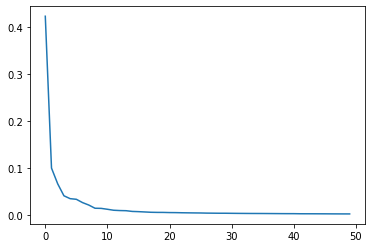

In [15]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

그래프를 보면 처음 10개의 주성분이 대부분의 분산을 표현하고 있다. 그다음부터는 각 주성분이 설명하고 있는 분산은 비교적 작다.

### - 다른 알고리즘과 함께 사용하기